# preliminaryResults Cibersort Fractions UMAP
```
Andrew Davidson
aedavids@ucsc.edu
4/4/2023
```

UMAP is a general purpose manifold learning and dimension reduction algorithm.
ref: [https://umap-learn.readthedocs.io/en/latest/basic_usage.html](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

ran Stanford docker on 2022-10-18-07 took 83:02 hrs. 
```
aedavids@mustard $ pwd
/private/groups/kimlab/GTEx_TCGA/cibersort.out/GTEx_TCGA_TrainGroupby_mixture

aedavids@mustard $ cat run_cibersortx_fractions.sh.parameters.txt 
docker run --detach --rm -e USERID=30108 
-v /scratch/aedavids/GTEx_TCGA/geneSignatureProfiles/best/tmp:/src/data 
-v /scratch/aedavids/cibersort.out/GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT:/src/outdir cibersortx/fractions 
--username aedavids@ucsc.edu 
--token 3f561ab6d4cf373d11f23d8e205b4b72
--mixture GTEx_TCGA_TrainGroupby_mixture.txt 
--sigmatrix signatureGenes.tsv --perm 100 
--label GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT --QN FALSE --verbose TRUE
```

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mplpatches
import numpy as np
from numpy.random import default_rng
import os
import pandas as pd
import pathlib as pl
from sklearn.decomposition import PCA
import sys
import umap

# set path so we can import local python packages to import MatPlotLibUtilities
module_path = os.path.abspath(os.path.join('../../../deseq/python'))
print(f'module_path : {module_path}')
if module_path not in sys.path:
    sys.path.append(module_path)
from plots.utilities import MatPlotLibUtilities


/private/home/aedavids/miniconda3/envs/extraCellularRNA/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-11 09:58:36.448534: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-11 09:58:36.448596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/private/home/aedavids/extraCellularRNA/terra/deseq/python


In [2]:
dockerRootPl = pl.Path("/private/groups/kimlab/GTEx_TCGA/cibersort.out/GTEx_TCGA_TrainGroupby_mixture")
dockerResultsPl =  dockerRootPl.joinpath("CIBERSORTx_GTEx_TCGA_TrainGroupby_mixture_Results.txt")

colDataRootPl = pl.Path("/private/groups/kimlab/GTEx_TCGA/groupbyGeneTrainingSets")
colDataPl = colDataRootPl.joinpath("GTEx_TCGA_TrainColData.csv")

imgOutPl = pl.Path("../img/clusters/preliminaryResultsCibersortFractionsUMAP")
imgOutPl.mkdir(parents=True, exist_ok=True)

## Load fractions 
filter out samples with high p-values and or low correlations. 

In [3]:
fractionsDF = pd.read_csv(dockerResultsPl, index_col='Mixture', sep="\t")
print(f'fractionsDF.shape : {fractionsDF.shape}')
fractionsDF_columns = fractionsDF.columns
fractionColumns = fractionsDF_columns[1:-3].values.tolist()
print(f'len(fractionColumns) : {len(fractionColumns)}')
fractionsStatsColumns = fractionsDF_columns[-3:]
print(f'fractionsStatsColumns : {fractionsStatsColumns}')

fractionsDF.shape : (15801, 86)
len(fractionColumns) : 82
fractionsStatsColumns : Index(['P-value', 'Correlation', 'RMSE'], dtype='object')


In [4]:
pValueThreshold = 0.001
selectRows = fractionsDF.loc[:, 'P-value'] <= pValueThreshold
signifigantFractionsDF = fractionsDF.loc[selectRows, :]
signifigantFractionsDF.shape

(14104, 86)

In [5]:
correlationThreshold = 0.9
selectRows = signifigantFractionsDF.loc[:, 'Correlation'] >= correlationThreshold
#print(f'len(selectRows) {len(selectRows)}  sum(selectRows) : {sum(selectRows)}' )
filteredFractionsDF = signifigantFractionsDF.loc[selectRows, :]
display(filteredFractionsDF.head())
filteredFractionsDF.shape

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,0.000002,0.320885,0.156637,0.000154,0.093915,0.114577,0.069651,0.002817,0.000000,0.010365,...,0.000000,0.000419,0.000000,0.000274,0.005279,0.000201,0.000000,0.0,0.985425,0.926455
GTEX-1117F-0526-SM-5EGHJ,0.000022,0.295300,0.150368,0.000842,0.084349,0.111973,0.084769,0.000000,0.000000,0.037517,...,0.001837,0.000000,0.000000,0.003625,0.058127,0.006272,0.000000,0.0,0.979791,0.934695
GTEX-1117F-0726-SM-5GIEN,0.000153,0.054458,0.010553,0.000014,0.000000,0.000000,0.016459,0.000000,0.000033,0.000851,...,0.000295,0.000000,0.000000,0.000000,0.000000,0.000063,0.002664,0.0,0.984906,0.447916
GTEX-1117F-2826-SM-5GZXL,0.000000,0.290041,0.142267,0.000078,0.077349,0.106923,0.041902,0.000503,0.000000,0.003527,...,0.000000,0.001126,0.000305,0.007555,0.000000,0.000000,0.011835,0.0,0.988464,0.907675
GTEX-1117F-3226-SM-5N9CT,0.000217,0.004459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,...,0.000000,0.000000,0.000183,0.008095,0.000050,0.000000,0.000439,0.0,0.917052,0.949553


(9873, 86)

## Select a balance sub set of sample

In [6]:
colDataDF = pd.read_csv(colDataPl, index_col='sample_id')
display(colDataDF.head())
colDataDF.shape

,participant_id,category,gender,age,dataSet
sample_id,,,,,
GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx
GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx
GTEX-1117F-0726-SM-5GIEN,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx
GTEX-1117F-2826-SM-5GZXL,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx
GTEX-1117F-3226-SM-5N9CT,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx


(15801, 5)

In [7]:
fractionsWithMetaDF = filteredFractionsDF.join(colDataDF, how='inner')
print(fractionsWithMetaDF.shape)
fractionsWithMetaDF.head()

(9873, 91)


,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Vagina,Whole_Blood,P-value,Correlation,RMSE,participant_id,category,gender,age,dataSet
GTEX-1117F-0226-SM-5GZZ7,0.000002,0.320885,0.156637,0.000154,0.093915,0.114577,0.069651,0.002817,0.000000,0.010365,...,0.000201,0.000000,0.0,0.985425,0.926455,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx
GTEX-1117F-0526-SM-5EGHJ,0.000022,0.295300,0.150368,0.000842,0.084349,0.111973,0.084769,0.000000,0.000000,0.037517,...,0.006272,0.000000,0.0,0.979791,0.934695,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx
GTEX-1117F-0726-SM-5GIEN,0.000153,0.054458,0.010553,0.000014,0.000000,0.000000,0.016459,0.000000,0.000033,0.000851,...,0.000063,0.002664,0.0,0.984906,0.447916,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx
GTEX-1117F-2826-SM-5GZXL,0.000000,0.290041,0.142267,0.000078,0.077349,0.106923,0.041902,0.000503,0.000000,0.003527,...,0.000000,0.011835,0.0,0.988464,0.907675,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx
GTEX-1117F-3226-SM-5N9CT,0.000217,0.004459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,...,0.000000,0.000439,0.0,0.917052,0.949553,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx


In [8]:
# fix gender. Male, male, Female, female
fractionsWithMetaDF['gender'] = fractionsWithMetaDF['gender'].str.lower()
fractionsWithMetaDF.groupby('gender').count()

,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,BLCA,BRCA,Bladder,...,Uterus,Vagina,Whole_Blood,P-value,Correlation,RMSE,participant_id,category,age,dataSet
gender,,,,,,,,,,,,,,,,,,,,,
female,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349,...,3349,3349,3349,3349,3349,3349,3349,3349,3349,3349
male,6524,6524,6524,6524,6524,6524,6524,6524,6524,6524,...,6524,6524,6524,6524,6524,6524,6524,6524,6524,6524


In [9]:
gender = fractionsWithMetaDF.loc[:, 'gender'].values
gender

array(['female', 'female', 'female', ..., 'female', 'female', 'female'],
      dtype=object)

# Plot

In [10]:
umapDF = fractionsWithMetaDF.loc[:, fractionColumns]
reducer = umap.UMAP()
umapEmbeddingNP = reducer.fit_transform(umapDF)
print(umapEmbeddingNP.shape)
umapEmbeddingNP[0:5,]

(9873, 2)


array([[ 6.246982 ,  5.2777815],
       [10.161429 ,  3.718035 ],
       [13.61072  , -3.7238755],
       [ 5.631907 ,  5.371094 ],
       [-4.15537  , -5.879621 ]], dtype=float32)

In [11]:
mplu = MatPlotLibUtilities()
mplu.loadStyle()

In [12]:
def uMapPlot(panel, xNP, yNP, title, labels, labelDict, markersize=5):
    # panel.set_xlabel("pca_1")
    # panel.set_ylabel("pca_2")

    # the scale of the axis is not meaning full
    panel.set_xticks([])
    panel.set_yticks([])

    # panel.set_title("Training Fractions")
    panel.set_title(title)

    for i in range( len(xNP) ):
        #markersize=5 #2.5 #1.5 #1.5,  # diameter of mark
        alpha=0.3
        # zorder is used to for our TE points and txt to be on top
        # of all other planes 
        zorder = 1  
        
        label=labels[i]
        color = labelDict[label]

        panel.plot(xNP[i], yNP[i], marker='o', 
                    markerfacecolor=color,
                   markeredgecolor=color,
                   markersize=markersize, 
                   markeredgewidth=0,
                   linewidth=0,
                   alpha=alpha,
                   zorder=zorder
                   ,label=label
                  )
    
    legendHandles = []
    legendLables = []
    y = 0
    for name, color in labelDict.items():
        p = mplpatches.Rectangle((0,y),2,1,
                                    linewidth=0,
                                    facecolor=color,
                                    edgecolor=(0,0,0))
        legendHandles.append(p)
        legendLables.append(name)
        y += 1
    
    legend = panel.legend(legendHandles, legendLables, loc='lower left')
    
    return legend

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


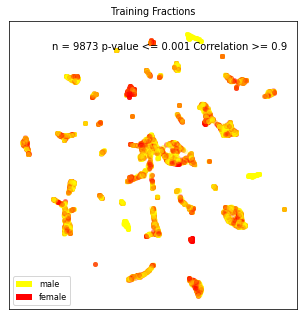

In [13]:
def maleFemaleUMapPlot():
    # set up figure
    # standard paper size is 8.5 inches x 11 inches
    pageWidthInInches = 4 # 8 
    pageHeightInInches = 4 # 8 
    fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

    panelWidthInInches = pageWidthInInches
    panelHeightInInches = pageHeightInInches
    leftRelativeSize = 0.2
    bottomRelativeSize = 0.2
    panel = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )


    xUMapNP = umapEmbeddingNP[:,0]
    yUMapNP = umapEmbeddingNP[:,1]
    title = "Training Fractions"
    labels = fractionsWithMetaDF.loc[:, 'gender'].values
    labelsDict = {'male' : 'yellow', 'female' : 'red'}

    ledgend =  uMapPlot(panel, xUMapNP, yUMapNP, title, labels, labelsDict)
    
    txt = f"n = {xUMapNP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    fig.text(x=0.35, y=1.1, s=txt, fontsize=10)

    imgFile = imgOutPl.joinpath("male_female")
    plt.savefig( imgFile, bbox_inches='tight', dpi=600, facecolor="white", transparent=True )
    
maleFemaleUMapPlot()

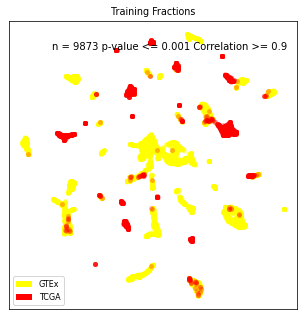

In [14]:
def GTEx_TCGA_UMapPlot():
    # set up figure
    # standard paper size is 8.5 inches x 11 inches
    pageWidthInInches = 4 # 8 
    pageHeightInInches = 4 # 8 
    fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

    panelWidthInInches = pageWidthInInches
    panelHeightInInches = pageHeightInInches
    leftRelativeSize = 0.2
    bottomRelativeSize = 0.2
    panel = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )

    xUMapNP = umapEmbeddingNP[:,0]
    yUMapNP = umapEmbeddingNP[:,1]
    
    title = "Training Fractions"
    labels = fractionsWithMetaDF.loc[:, 'dataSet'].values
    labelsDict = {'GTEx' : 'yellow', 'TCGA' : 'red'}

    ledgend =  uMapPlot(panel, xUMapNP, yUMapNP, title, labels, labelsDict)

    txt = f"n = {xUMapNP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    fig.text(x=0.35, y=1.1, s=txt, fontsize=10)


    imgFile = imgOutPl.joinpath("gtex_tcga")
    plt.savefig( imgFile, bbox_inches='tight', dpi=600, facecolor="white", transparent=True )
    
GTEx_TCGA_UMapPlot()

# SPECIAL BEGIN

In [15]:
def removeUnderRepresentedClasses(xUMapNP, yUMapNP, labels, filterThreshold):
    tmpDF = pd.DataFrame({
        "x" : xUMapNP,
        "y" : yUMapNP,
        "label" : labels,
    })
    print(tmpDF.shape)

    pd.set_option('display.max_rows', None)
    groupyDF = tmpDF.groupby('label').count()
    #display(groupyDF)
    #print(groupyDF.shape)
        
    #print("\n\n**************\n\n")
    
    selectRows = groupyDF.loc[:, "x"] >= filterThreshold
    labelDF = groupyDF.loc[selectRows, :]
    #display(labelDF)
    #print(labelDF.shape)
    
    goodLabels = labelDF.index.values.tolist()
    #print(goodLabels)
    #print(len(goodLabels))
    
    selectRetRows = tmpDF.loc[:, 'label'].isin(goodLabels)
    aboveDF = tmpDF.loc[selectRetRows, :]
    #print(f'a {aboveDF.shape}')
    
    selectBelowRetRows = [not b for b in selectRetRows]
    belowDF = tmpDF.loc[ selectBelowRetRows, :]
    #print(f'b {bellowDF.shape}')

    return aboveDF, belowDF
    
def testRemoveUnderRepresentedClasses() :  
    testDict = {'x': [20.163488388061523,
  20.972322463989258,
  19.96340560913086,
  20.5218448638916,
  27.260793685913086,
  20.028751373291016,
  27.263185501098633,
  20.751859664916992,
  27.22829818725586,
  20.975513458251953,
  27.265377044677734,
  27.287830352783203,
  27.263185501098633,
  20.751859664916992,
  20.695938110351562,
  20.238466262817383,
  27.220291137695312,
  27.265546798706055,
  27.220291137695312,
  20.278850555419922,
  15.091998100280762,
  27.265546798706055],
 'y': [6.704344749450684,
  6.839563369750977,
  5.97960090637207,
  6.061955451965332,
  13.701770782470703,
  6.085829734802246,
  13.699718475341797,
  6.426485061645508,
  13.732505798339844,
  6.863352298736572,
  13.697519302368164,
  13.674736022949219,
  13.699718475341797,
  6.426485061645508,
  6.3708109855651855,
  6.163453578948975,
  13.73963737487793,
  13.697412490844727,
  13.73963737487793,
  6.078231334686279,
  15.15853500366211,
  13.697412490844727],
 'label': ['BLCA',
  'BLCA',
  'BLCA',
  'BLCA',
  'KIRC',
  'BLCA',
  'KIRC',
  'BLCA',
  'KIRC',
  'BLCA',
  'KIRC',
  'KIRC',
  'KIRC',
  'BLCA',
  'BLCA',
  'BRCA',
  'KIRC',
  'KIRC',
  'KIRC',
  'BLCA',
  'BRCA',
  'KIRC']}


    
    testDF = pd.DataFrame(testDict)
    #print(testDF.shape)
    testX = testDF.loc[:,'x'].values
    #print(testX.shape)
    testY = testDF.loc[:,'y'].values
    #print(testY.shape)

    testLabels = testDF.loc[:,'label'].values
    #print(testLabels.shape)


    aboveDF, belowDF = removeUnderRepresentedClasses(testX, testY, testLabels, filterThreshold=5) 
    print("\n***** results***\n")
    print(f'testX.shape : {testX.shape}')
    print(f'aboveDF.shape   : {aboveDF.shape}')
    print(f'aboveDF.columns : {aboveDF.columns}' )
    print(f'belowDF.shape   : {belowDF.shape}')
    #display(aboveDF)
    
testRemoveUnderRepresentedClasses()

(22, 3)

***** results***

testX.shape : (22,)
aboveDF.shape   : (20, 3)
aboveDF.columns : Index(['x', 'y', 'label'], dtype='object')
belowDF.shape   : (2, 3)


In [16]:
def specialUMapPlotData(umapEmbeddingNP, randomSampleSize, fractionsWithMetaDF, 
                        metaColName='category', 
                        randomSeed=None,
                       filterThreshold=None
                       ):
    
    #random selection
    low = 0 # smallest idx
    numRows = umapEmbeddingNP.shape[0]
    high = numRows # largest idx
    # numSamples = 1000 # number of random sample to select
    
    if randomSeed:
        rng = np.random.default_rng(randomSeed)
    else:
        ng = np.random.default_rng()
        
    ridx = rng.integers(low=low, high=numRows, size=randomSampleSize)
    randomUmapEmbeddingNP = umapEmbeddingNP[ridx]
    xUMapNP = umapEmbeddingNP[ridx,0]
    yUMapNP = umapEmbeddingNP[ridx,1]
    randomDF  = fractionsWithMetaDF.iloc[ridx]
    labels = randomDF.loc[:, metaColName].values
    #print(f"numRows : {numRows} high : {high} randomUmapEmbeddingNP.shape : {randomUmapEmbeddingNP.shape}")

    if filterThreshold:
        aboveDF, belowDF = removeUnderRepresentedClasses(xUMapNP, yUMapNP, labels, filterThreshold)
        xUMapNP = aboveDF.loc[:, 'x'].values
        yUMapNP = aboveDF.loc[:, 'y'].values
        labels = aboveDF.loc[:, 'label'].values 
        # display(aboveDF.groupby('label').count())
        # print("********* bellow ****")
        # display(belowDF.groupby('label').count())
    
    uniqeLables = list( set(labels) )
    uniqeLables.sort()
    # print(f'uniqeLables[0] {uniqeLables[0]}')
    # print(f'uniqeLables[-2:] {uniqeLables[-2:]}')

    numLabels = len(uniqeLables)
    print(f'numLabels : {numLabels}')
    
    colors = [
        tuple((c/255 for c in [198,  10,  10])), # red
        tuple((c/255 for c in [255, 179,  50])), # orange
        tuple((c/255 for c in [250, 223,  22])), # yellow
        tuple((c/255 for c in [104, 159,  29])), # green
        tuple((c/255 for c in [ 60, 222, 171])), # teal
        tuple((c/255 for c in [ 99, 246, 245])), # light blue
        tuple((c/255 for c in [ 11,  65, 181])), # dark blue
        tuple((c/255 for c in [202, 161, 245])), # purple
        tuple((c/255 for c in [223,  14, 191])), # pink
        tuple((c/255 for c in [  0,   0,   0])), # black
        tuple((c/255 for c in [136, 136, 136])), # grey
        tuple((c/255 for c in [ 99,  61,   9]))  # brown
    ]
    
    markerShapes = [
        'o', # "circle",
        '^', # "trangle_up",
        's', # "square",
        #'x', # "x", we set linestyle=None this marker is not displayed
        'P', # "plus",
        'v', # "trangle_down",
        "*", # "star",
        "p" # "pentagon"
    ]
    

    labelsDict = {}
    count = 0
    i = 0
    j = 0
    #print(f'numLables : {numLabels}')
    while count < numLabels:
        if i >= len(markerShapes) :
            i = 0
        markerShape = markerShapes[i]
        i += 1
        
        j = 0
        while (j < len(colors)) and (count < numLabels):
            color = colors[j]
            j += 1
            
            label = uniqeLables[count]
            labelsDict[label] = (markerShape, color)
            count += 1
            
        
    
    return (xUMapNP, yUMapNP, labels, labelsDict)
    
   
def testSpecialUMapPlotData():
    randomSampleSize=1500
    xUMapNP, yUMapNP, labels, labelsDict = specialUMapPlotData(umapEmbeddingNP, 
                                                               randomSampleSize,
                                                               fractionsWithMetaDF, 
                                                               metaColName='category', 
                                                               randomSeed=42)
    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'len(labels)      : {len(labels)}  ')
    print(f'len(labelsDict)  : {len(labelsDict)}')
    print(f'labelsDict["Adipose_Visceral_Omentum"] : {labelsDict["Adipose_Visceral_Omentum"]}')

    # print("\n*******")
    # keys = list(labelsDict.keys())
    # keys.sort()
    # for key in keys:
    #     print( f'{key}\t\t\t\t {labelsDict[key]}')
    
testSpecialUMapPlotData()

numLabels : 76
xUMapNP.shape    : (1500,)
xUMapNP.shape    : (1500,)
len(labels)      : 1500  
len(labelsDict)  : 76
labelsDict["Adipose_Visceral_Omentum"] : ('o', (0.9803921568627451, 0.8745098039215686, 0.08627450980392157))


In [17]:
def specialUMapPlot(xUMapNP, yUMapNP, labels, labelsDict, panel=None) :
    
    if not panel:
        # set up figure
        # standard paper size is 8.5 inches x 11 inches
        pageWidthInInches = 12 #4 # 8 
        pageHeightInInches = 12 # 4 # 8 
        fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

        panelWidthInInches = pageWidthInInches
        panelHeightInInches = pageHeightInInches
        leftRelativeSize = 0.2
        bottomRelativeSize = 0.2
        panel = mplu.createPanel( fig,
                            panelWidthInInches, panelHeightInInches,
                            leftRelativeSize, bottomRelativeSize )

    
    # title = "Training Fractions"

    # the scale of the axis is not meaning full
    panel.set_xticks([])
    panel.set_yticks([])

    # panel.set_title("Training Fractions")
    #panel.set_title(title)

    markerSize = 6 #8 # 5 # 10  # diameter of mark
    alpha = 0.5 # 0.3
    # zorder is used to for our TE points and txt to be on top
    # of all other planes 
    zorder = 1  
    
    # TODO replace for loop with scatter. it is faster
    for i in range( len(xUMapNP) ):      
        label=labels[i]
        shape, color = labelsDict[label]
        #print(f'{shape} {color}')

        panel.plot(xUMapNP[i], yUMapNP[i], marker=shape, 
                    markerfacecolor=color,
                   markeredgecolor=color,
                   markersize=markerSize, 
                   markeredgewidth=0,
                   linewidth=0,
                   alpha=alpha,
                   zorder=zorder
                   ,label=label
                  )
    
    
def createSpecialUMapPlot(umapEmbeddingNP, fractionsWithMetaDF, randomSampleSize):
    xUMapNP, yUMapNP, labels, labelsDict = specialUMapPlotData(umapEmbeddingNP, 
                                                               randomSampleSize,
                                                               fractionsWithMetaDF, 
                                                               metaColName='category', 
                                                               randomSeed=42,
                                                              filterThreshold=None)


    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'len(labels)      : {len(labels)}  ')
    print(f'len(labelsDict)  : {len(labelsDict)}')


    specialUMapPlot(xUMapNP, yUMapNP, labels, labelsDict)
    
#createSpecialUMapPlot(umapEmbeddingNP, fractionsWithMetaDF, randomSampleSize=1500)

# Clean up

In [18]:
def createLegend(panel, markerSize, labelsDict ):
    # https://matplotlib.org/2.0.2/users/legend_guide.html
    # blue_line = mlines.Line2D([], [], color='blue', marker='*',
    #                       markersize=15, label='Blue stars')
    # plt.legend(handles=[blue_line])
    
    legendHandles = []
    legendLables = []
    y = 0    
    for name, tup in labelsDict.items():
        markerShape, color = tup
        # p = mplpatches.Rectangle((0,y),2,1,
        #                             linewidth=0,
        #                             facecolor=color,
        #                             edgecolor=(0,0,0))
        
        # we only want the marker shape, set linestyle = none to prevent line from being rendered
        p = mlines.Line2D([0], [y], color=color, marker=markerShape, linestyle='None',
                          markersize=markerSize, label=name)
        legendHandles.append(p)
        legendLables.append(name)
        y += 1
    
    legend = panel.legend(legendHandles, legendLables, loc='center left', frameon=False)    

    return legend

In [19]:
def createPanels():
    pageWidthInInches = 8 
    pageHeightInInches = 6
    fig = plt.figure( figsize=( pageWidthInInches, pageHeightInInches ) )

    
    panelWidthInInches = 6 # 4
    panelHeightInInches = 6
    leftRelativeSize = 0.1
    bottomRelativeSize = 0.2
    panel1 = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )
    
    panelWidthInInches = 2
    panelHeightInInches = 6
    leftRelativeSize = 0.85 
    bottomRelativeSize = 0.2
    panel2 = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )
    
    panelWidthInInches = 2
    panelHeightInInches = 6
    leftRelativeSize = 1.15 # 1.1 # 1.2 # 0.95
    bottomRelativeSize = 0.2
    panel3 = mplu.createPanel( fig,
                        panelWidthInInches, panelHeightInInches,
                        leftRelativeSize, bottomRelativeSize )  
    
    panels = [panel1, panel2, panel3]

    for p in panels:
        # the scale of the axis is not meaning full
        p.set_xticks([])
        p.set_yticks([])
        
    return (fig, panel1, panel2 , panel3)

(1500, 3)
numLabels : 51
xUMapNP.shape    : (1368,)
xUMapNP.shape    : (1368,)
len(labels)      : 1368  
len(labelsDict)  : 51


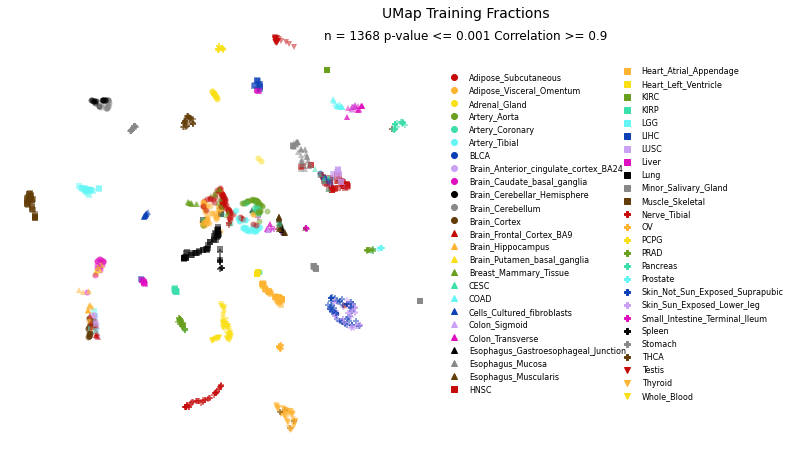

In [67]:
def createCleanupPlot(umapEmbeddingNP, fractionsWithMetaDF, randomSampleSize=1500, filterThreshold=10):
    
    metaColName = 'category'

    rSeed = 42
    xUMapNP, yUMapNP, labels, labelsDict = specialUMapPlotData(umapEmbeddingNP,
                                                                randomSampleSize,
                                                                fractionsWithMetaDF, 
                                                                metaColName,
                                                                rSeed,
                                                                filterThreshold )   

    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'xUMapNP.shape    : {xUMapNP.shape}')
    print(f'len(labels)      : {len(labels)}  ')
    print(f'len(labelsDict)  : {len(labelsDict)}')

    #
    # set up title
    #
    fig, panel1, panel2, panel3 = createPanels()
    title = "UMap Training Fractions"
    fig.text(0.75, 1.2, title, fontsize=14)
    
    txt = f"n = {xUMapNP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    fig.text(x=0.65, y=1.15, s=txt, fontsize=12)

    
    specialUMapPlot(xUMapNP, yUMapNP, labels, labelsDict, panel1)

    markerSize = 6
    # split labelsDict in half
    labelsDict1 = dict(list(labelsDict.items())[len(labelsDict)//2:])
    labelsDict2 = dict(list(labelsDict.items())[:len(labelsDict)//2])
    legendP2 = createLegend(panel3, markerSize, labelsDict1 )
    legendp3 = createLegend(panel2, markerSize, labelsDict2 )

    # turn all the boarders off
    panel1.axis('off')
    panel2.axis('off')
    panel3.axis('off')
    
    #ax.spines['top'].set_visible(False)

    
    # txt = f"n = {xUMapNP.shape[0]} p-value <= {pValueThreshold} Correlation >= {correlationThreshold}"
    # y = 19 # 10  # 1.1
    # x = 0.35
    # panel1.text(x=0.35, y=y, s=txt, fontsize=10)
    # fig.text(x=0.65, y=1.15, s=txt, fontsize=12)

    imgFile = imgOutPl.joinpath("category")
    plt.savefig( imgFile, bbox_inches='tight', dpi=600, facecolor="white", transparent=True )
    
    
createCleanupPlot(umapEmbeddingNP, fractionsWithMetaDF)

In [55]:
def foo():
    selectGTExRows = fractionsWithMetaDF.loc[:, 'dataSet'] == 'GTEx'
    print(sum(selectGTExRows))
    GTExDF =  fractionsWithMetaDF.loc[selectGTExRows, ['category']]
    display(GTExDF.head())
    
    aaa = GTExDF.sort_values(by=['category'])
    print(type(aaa))
    display( aaa.head()  )

    bbbNP = aaa.values.tolist()
    print(np.unique( bbbNP ))
    
    print()
    print(len(np.unique( bbbNP )))
    
foo()

7719


,category
GTEX-1117F-0226-SM-5GZZ7,Adipose_Subcutaneous
GTEX-1117F-0526-SM-5EGHJ,Artery_Tibial
GTEX-1117F-0726-SM-5GIEN,Heart_Atrial_Appendage
GTEX-1117F-2826-SM-5GZXL,Breast_Mammary_Tissue
GTEX-1117F-3226-SM-5N9CT,Brain_Cortex


<class 'pandas.core.frame.DataFrame'>


,category
GTEX-1117F-0226-SM-5GZZ7,Adipose_Subcutaneous
GTEX-18QFQ-0226-SM-731BQ,Adipose_Subcutaneous
GTEX-1A32A-0226-SM-718B2,Adipose_Subcutaneous
GTEX-1A3MW-0226-SM-7939O,Adipose_Subcutaneous
GTEX-1A8FM-0126-SM-7SB7P,Adipose_Subcutaneous


['Adipose_Subcutaneous' 'Adipose_Visceral_Omentum' 'Adrenal_Gland'
 'Artery_Aorta' 'Artery_Coronary' 'Artery_Tibial' 'Bladder'
 'Brain_Amygdala' 'Brain_Anterior_cingulate_cortex_BA24'
 'Brain_Caudate_basal_ganglia' 'Brain_Cerebellar_Hemisphere'
 'Brain_Cerebellum' 'Brain_Cortex' 'Brain_Frontal_Cortex_BA9'
 'Brain_Hippocampus' 'Brain_Hypothalamus'
 'Brain_Nucleus_accumbens_basal_ganglia' 'Brain_Putamen_basal_ganglia'
 'Brain_Spinal_cord_cervical_c-1' 'Brain_Substantia_nigra'
 'Breast_Mammary_Tissue' 'Cells_Cultured_fibroblasts'
 'Cells_EBV-transformed_lymphocytes' 'Cervix_Endocervix' 'Colon_Sigmoid'
 'Colon_Transverse' 'Esophagus_Gastroesophageal_Junction'
 'Esophagus_Mucosa' 'Esophagus_Muscularis' 'Heart_Atrial_Appendage'
 'Heart_Left_Ventricle' 'Kidney_Cortex' 'Liver' 'Lung'
 'Minor_Salivary_Gland' 'Muscle_Skeletal' 'Nerve_Tibial' 'Ovary'
 'Pancreas' 'Pituitary' 'Prostate' 'Skin_Not_Sun_Exposed_Suprapubic'
 'Skin_Sun_Exposed_Lower_leg' 'Small_Intestine_Terminal_Ileum' 'Spleen'
 'Stoma

(5268, 6)
3471


,category
0,Adipose_Subcutaneous
1,Artery_Tibial
2,Artery_Coronary
3,Adipose_Visceral_Omentum
4,Vagina


['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial', 'Brain_Amygdala', 'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia', 'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex', 'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus', 'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia', 'Brain_Spinal_cord_cervical_c-1', 'Brain_Substantia_nigra', 'Breast_Mammary_Tissue', 'Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes', 'Colon_Sigmoid', 'Colon_Transverse', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa', 'Esophagus_Muscularis', 'Heart_Atrial_Appendage', 'Heart_Left_Ventricle', 'Kidney_Cortex', 'Liver', 'Lung', 'Minor_Salivary_Gland', 'Muscle_Skeletal', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg', 'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach'